In [1]:
import pandas as pd

In [2]:
df

C:\Users\sujat\Downloads\iris


In [3]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 4CA8-C130

 Directory of C:\Users\sujat\Downloads\iris

04/08/2025  03:10 PM    <DIR>          .
05/22/2025  09:45 AM    <DIR>          ..
04/08/2025  03:10 PM             4,551 bezdekIris.data
04/08/2025  03:10 PM               105 Index
04/08/2025  03:10 PM             4,551 iris.data
04/08/2025  03:10 PM             2,998 iris.names
               4 File(s)         12,205 bytes
               2 Dir(s)  654,292,504,576 bytes free


### Ingest the data

In [53]:
df = pd.read_csv("Iris.data", header = None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df.columns 

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [7]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Data cleaning

In [9]:
df.shape

(150, 5)

In [10]:
df.size

750

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [14]:
df.duplicated().sum()

3

In [15]:
df.drop_duplicates(inplace = True)

In [16]:
df.shape

(147, 5)

### Find outliers

In [18]:
# min_thresold , max_thresold = df.petal_length.quantile([0.001, 0.999])
# min_thresold , max_thresold

In [19]:
# # Calculate IQR
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# # Find outliers
# outliers_iqr = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# # Count outliers per column
# print("IQR based outliers per feature:")
# print(outliers_iqr.sum())


In [20]:
df['class'].value_counts()
       

class
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

### Split the data


### Dividing into Target and Predictoir variables

In [23]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
# X = df.iloc[2, 0:4] (range, row, column)
# X
# X = df.iloc[2, :]
# X
sc
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
y = df.iloc[:,-1]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 147, dtype: object

In [26]:
y = df['class']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 147, dtype: object

In [27]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [28]:
import seaborn as sns

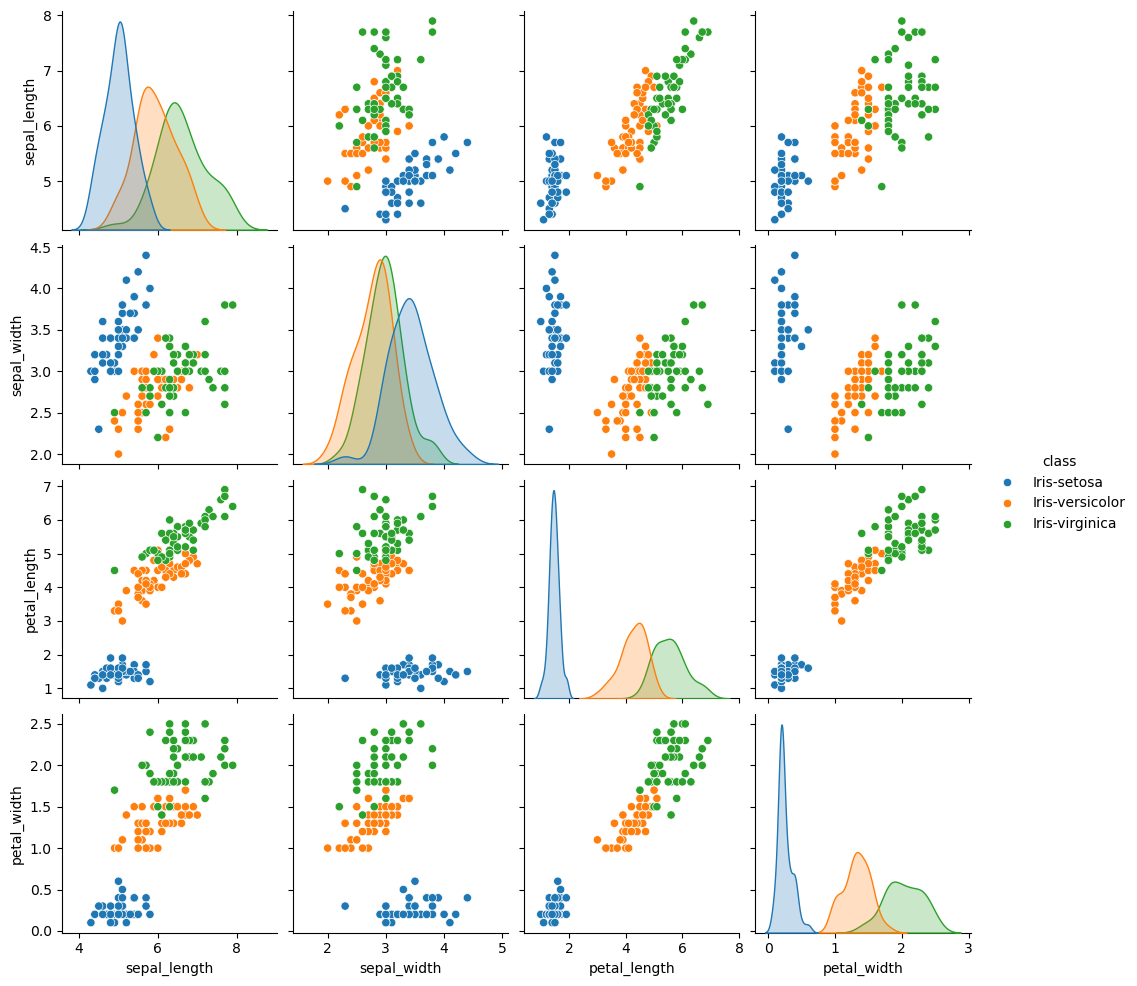

In [29]:
sns.pairplot(df, hue = 'class')

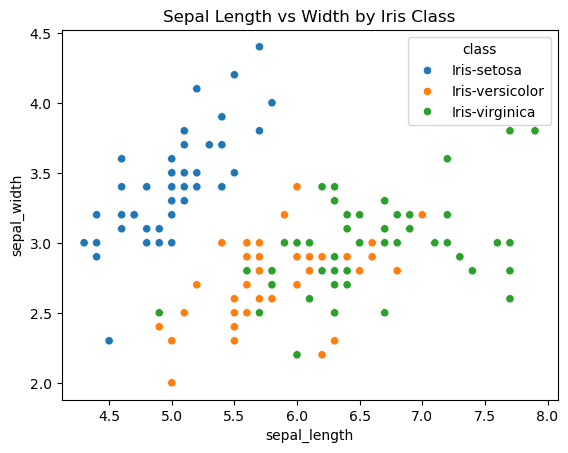

In [30]:
# Scatter plot: Sepal Length vs Sepal Width,colored by class
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="class")
plt.title("Sepal Length vs Width by Iris Class")
plt.show()

## Why do we split the dataset?
DATA IS feed into model for training it gives us accuracy, if we split it into 80:20 and compare the accuracy of test and train data, if accuracy of training data is very high than test our model is overfit if low model is underfit

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#random_satate means spliting data i;e. take same in X train and X test and for y vice-versa and give the same data set in every run

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
X_train = scaler.fit_transform(X_train)
# fit_transform() is used on the training data to learn the parameters and transform it

In [36]:
X_train

array([[ 0.59486878,  0.05831127,  0.94250316,  0.76726863],
       [-1.60687754,  0.28572521, -1.38920785, -1.36694663],
       [-0.38368514, -0.62393057,  0.60127716,  1.03404553],
       [-0.8729621 ,  0.96796705, -1.33233685, -1.36694663],
       [-1.11760058,  1.195381  , -1.38920785, -1.36694663],
       [ 1.57342271, -0.16910268,  1.11311616,  0.50049172],
       [ 2.42965739,  1.65020889,  1.45434216,  1.03404553],
       [ 0.3502303 ,  0.74055311,  0.88563216,  1.43421089],
       [-0.99528134,  1.65020889, -1.10485285, -1.10016972],
       [-0.62832362,  1.87762284, -1.44607885, -1.10016972],
       [-0.62832362,  1.42279495, -1.33233685, -1.36694663],
       [ 2.18501891,  1.65020889,  1.62495516,  1.30082244],
       [ 0.47254954, -1.7610003 ,  0.31692216,  0.10032636],
       [ 1.20646499,  0.05831127,  0.71501916,  1.43421089],
       [ 0.83950727, -0.39651662,  0.43066416,  0.10032636],
       [-0.2613659 , -0.16910268,  0.20318015, -0.0330621 ],
       [ 1.08414575,  0.

In [37]:
X_test = scaler.transform(X_test)
# transform() is useed on new or test data to apply same transformation that was learned on the train data

In [38]:
X_test

array([[ 0.22791106, -0.16910268,  0.60127716,  0.76726863],
       [-0.50600438, -1.7610003 ,  0.08943815,  0.10032636],
       [ 0.96182651,  0.05831127,  0.99937416,  1.56759935],
       [-0.99528134,  1.65020889, -1.33233685, -1.23355818],
       [-1.23991982, -1.30617241,  0.37379316,  0.63388017],
       [-1.36223906, -0.16910268, -1.38920785, -1.50033509],
       [ 0.10559182, -0.39651662,  0.37379316,  0.36710327],
       [-0.62832362,  0.74055311, -1.33233685, -1.10016972],
       [ 0.10559182, -0.85134452,  0.71501916,  0.50049172],
       [-1.23991982,  0.05831127, -1.33233685, -1.50033509],
       [-1.11760058,  0.74055311, -1.27546585, -1.10016972],
       [-0.99528134, -1.30617241, -0.47927185, -0.16645055],
       [ 0.47254954, -1.30617241,  0.65814816,  0.90065708],
       [-0.38368514, -1.30617241,  0.03256715, -0.16645055],
       [ 0.47254954,  0.74055311,  0.99937416,  1.56759935],
       [ 0.3502303 , -1.98841425,  0.37379316,  0.36710327],
       [-0.2613659 ,  1.

In [39]:
y_test

127     Iris-virginica
53     Iris-versicolor
140     Iris-virginica
19         Iris-setosa
106     Iris-virginica
12         Iris-setosa
78     Iris-versicolor
31         Iris-setosa
83     Iris-versicolor
9          Iris-setosa
26         Iris-setosa
98     Iris-versicolor
146     Iris-virginica
69     Iris-versicolor
136     Iris-virginica
68     Iris-versicolor
18         Iris-setosa
71     Iris-versicolor
126     Iris-virginica
30         Iris-setosa
29         Iris-setosa
107     Iris-virginica
38         Iris-setosa
120     Iris-virginica
57     Iris-versicolor
22         Iris-setosa
66     Iris-versicolor
135     Iris-virginica
84     Iris-versicolor
11         Iris-setosa
Name: class, dtype: object

In [40]:
y_train

137     Iris-virginica
47         Iris-setosa
121     Iris-virginica
27         Iris-setosa
4          Iris-setosa
            ...       
73     Iris-versicolor
108     Iris-virginica
14         Iris-setosa
94     Iris-versicolor
104     Iris-virginica
Name: class, Length: 117, dtype: object

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [42]:
model.fit(X_train, y_train)

LogisticRegression()

In [43]:
model.predict(X_test)

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [44]:
model.score(X_test, y_test)

0.9333333333333333

In [45]:
model.predict(X_train)

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versico

In [46]:
model.score(X_train, y_train)

0.9743589743589743

### to find overall accuracy

In [48]:
# confusion matrix
y_predicted = model.predict(X_tes t)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1679022327.py, line 2)

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')